In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sc
import random
from scipy.spatial import distance
import sys
import time
import math

### Statistics Warmup

#### Problem 1

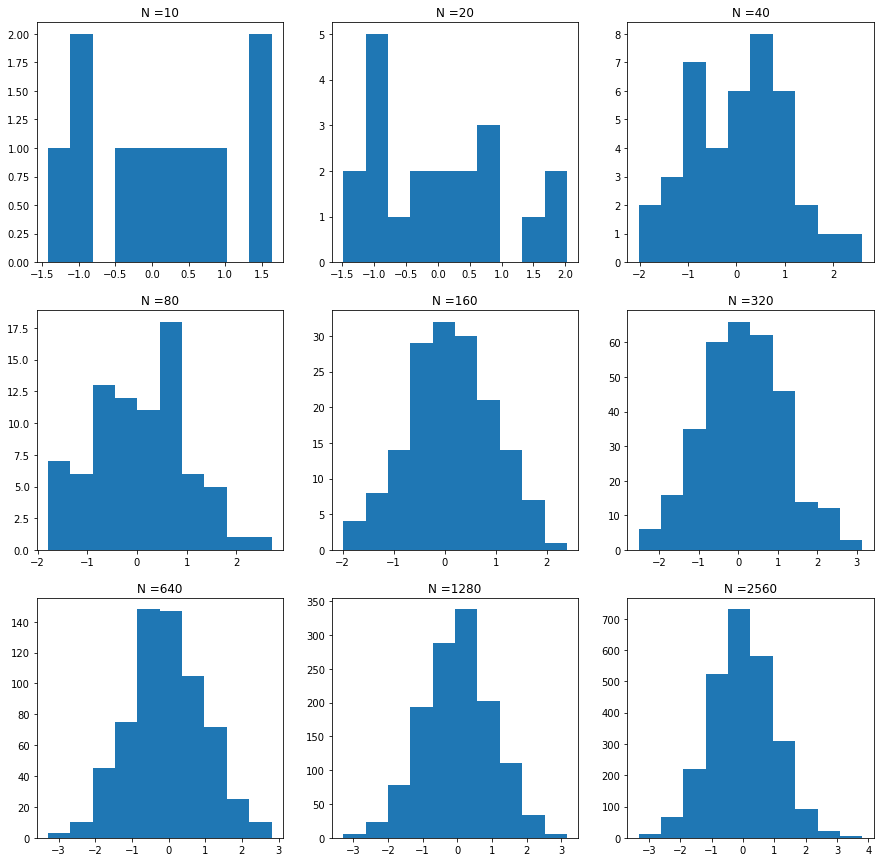

In [2]:
fig, ax = plt.subplots(3, 3,figsize=(15,15))
n = 10
for i in range (3):
    for j in range (3):
        s = np.random.normal(0,1,n)
        ax[i,j].hist(s)
        ax[i,j].set_title("N ="+str(n))
        n = n*2
plt.show()

#### Problem 2.1

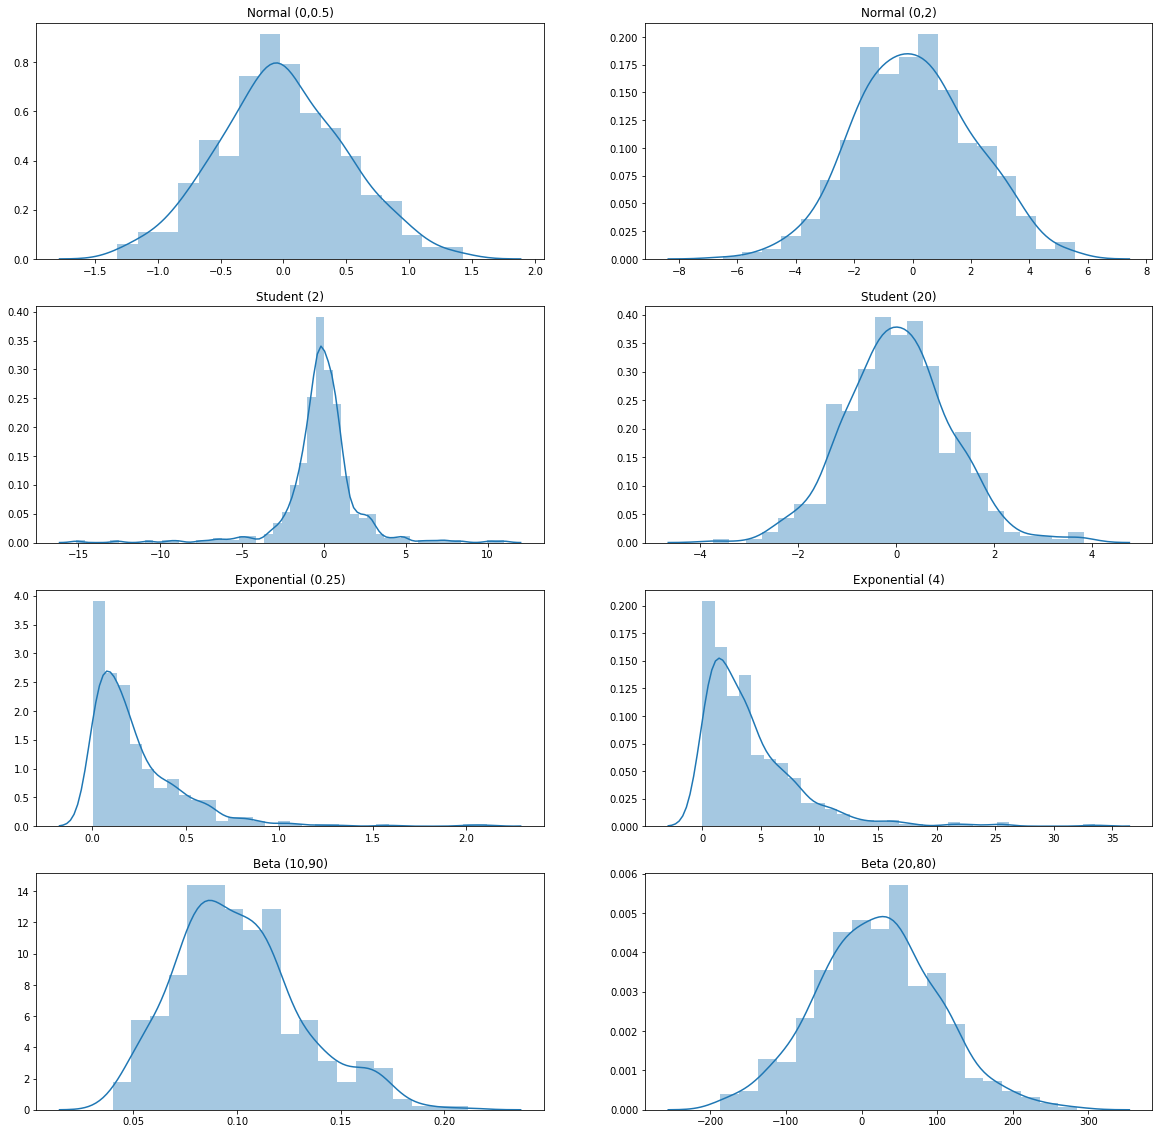

In [3]:
fig, ax = plt.subplots(4, 2,figsize=(20,20))
m = 500
sns.distplot(np.random.normal(0,0.5,m), ax=ax[0,0])
ax[0,0].set_title("Normal (0,0.5)")
sns.distplot(np.random.normal(0,2,m), ax=ax[0,1])
ax[0,1].set_title("Normal (0,2)")
sns.distplot(np.random.standard_t(2,m), ax=ax[1,0])
ax[1,0].set_title("Student (2)")
sns.distplot(np.random.standard_t(20,m), ax=ax[1,1])
ax[1,1].set_title("Student (20)")
sns.distplot(np.random.exponential(0.25,m), ax=ax[2,0])
ax[2,0].set_title("Exponential (0.25)")
sns.distplot(np.random.exponential(4,m), ax=ax[2,1])
ax[2,1].set_title("Exponential (4)")
sns.distplot(np.random.beta(10,90,m), ax=ax[3,0])
ax[3,0].set_title("Beta (10,90)")
sns.distplot(np.random.normal(20,80,m), ax=ax[3,1])
ax[3,1].set_title("Beta (20,80)")
plt.show()

#### Problem 2.2

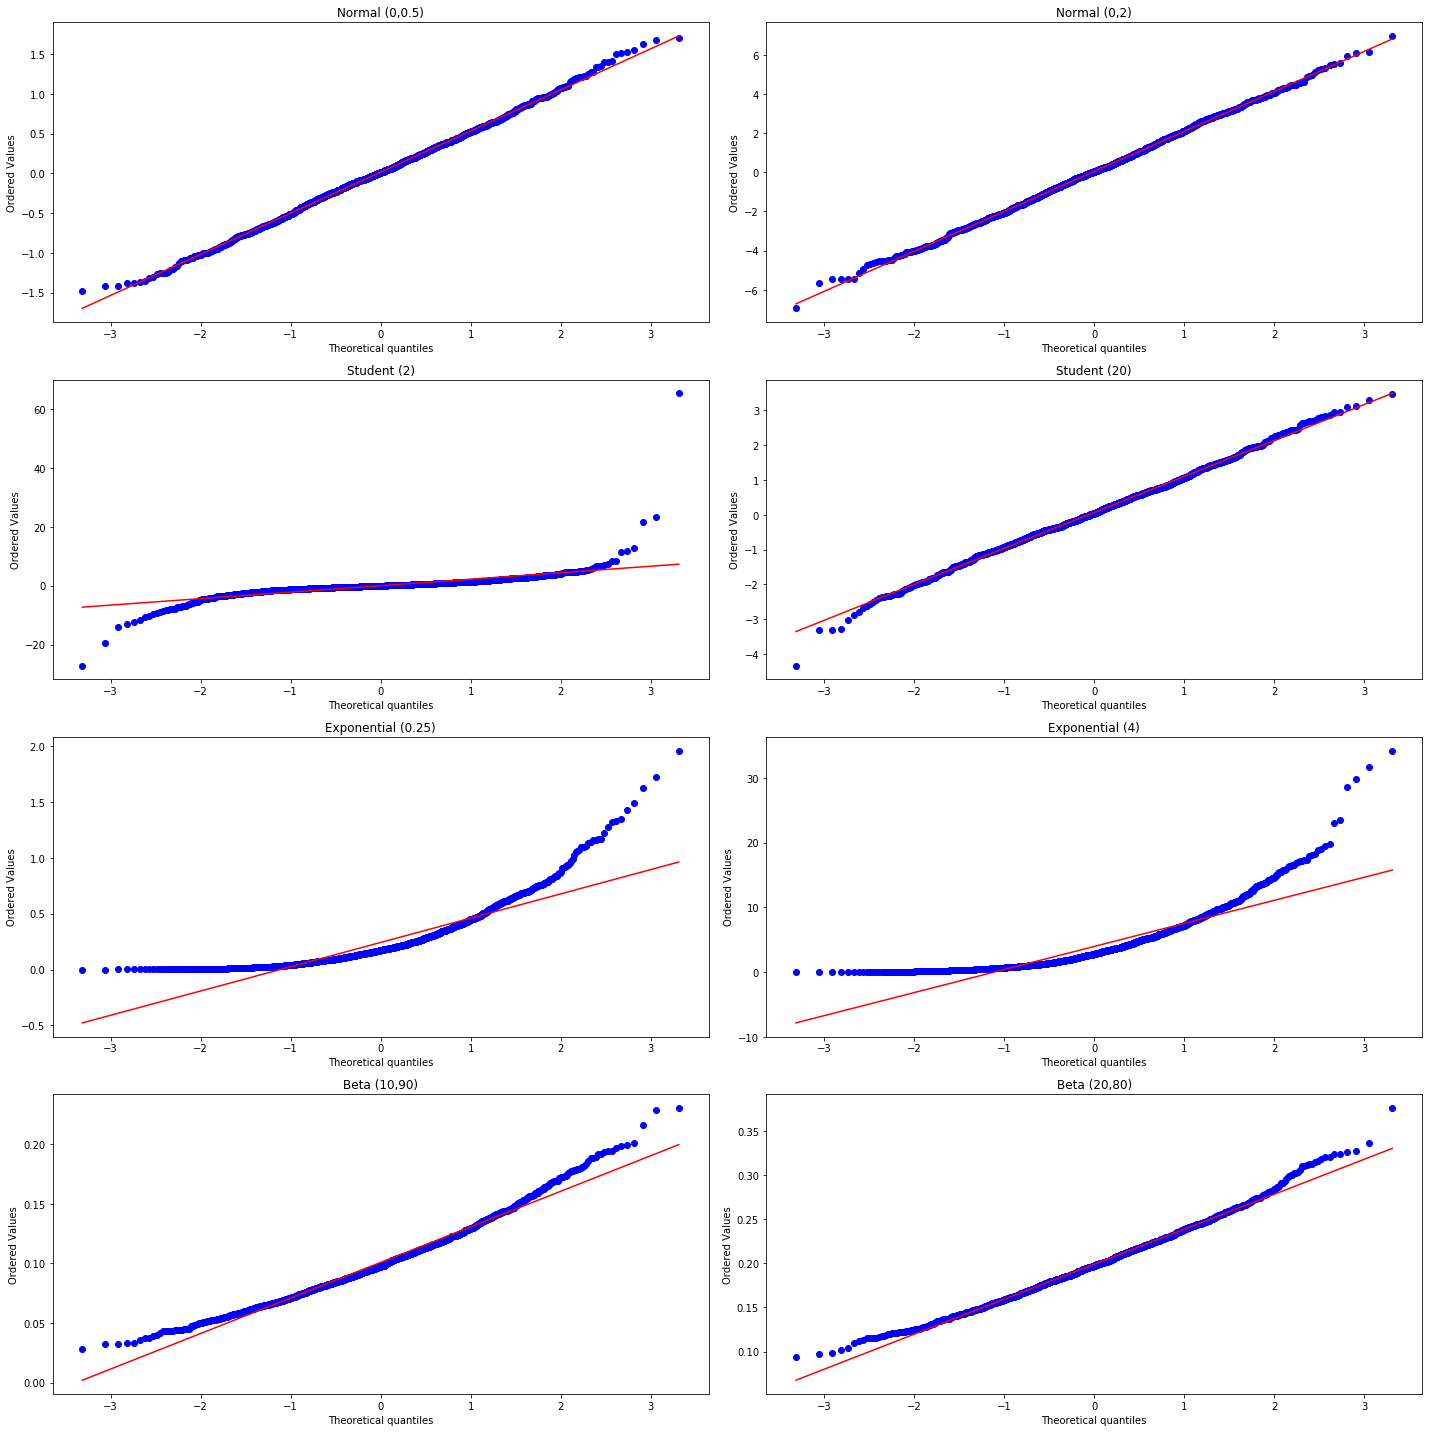

In [4]:
fig, ax = plt.subplots(4, 2,figsize=(20,20))
sc.stats.probplot(np.random.normal(0,0.5,1500), plot=ax[0,0])
sc.stats.probplot(np.random.normal(0,2,1500), plot=ax[0,1])
sc.stats.probplot(np.random.standard_t(2,1500), plot=ax[1,0])
sc.stats.probplot(np.random.standard_t(20,1500), plot=ax[1,1])
sc.stats.probplot(np.random.exponential(0.25,1500), plot=ax[2,0])
sc.stats.probplot(np.random.exponential(4,1500), plot=ax[2,1])
sc.stats.probplot(np.random.beta(10,90,1500), plot=ax[3,0])
sc.stats.probplot(np.random.beta(20,80,1500), plot=ax[3,1])
ax[0,0].set_title("Normal (0,0.5)")
ax[0,1].set_title("Normal (0,2)")
ax[1,0].set_title("Student (2)")
ax[1,1].set_title("Student (20)")
ax[2,0].set_title("Exponential (0.25)")
ax[2,1].set_title("Exponential (4)")
ax[3,0].set_title("Beta (10,90)")
ax[3,1].set_title("Beta (20,80)")
plt.tight_layout()
plt.show()

#### Problem 2.3 Interpret S-shape, U-shape

### Simulate Random Waypoint & Look At What You Have Done

#### Problem 3

In [5]:
SCIPER = 219665
N = 100
l = 1000
L = 1000
V_MIN = 0.5 + 0.02*(SCIPER%21)
V_MAX = 3 + 0.2*(SCIPER%11)
T_STOP = 86400

print("V_MIN:", V_MIN, ", V_MAX:", V_MAX)

V_MIN: 0.6 , V_MAX: 4.2


In [6]:
def get_pos_n(l,L):
    return (random.randint(0,l), random.randint(0,L))

In [7]:
def get_speed_n(v_min, v_max):
    return random.uniform(v_min, v_max)

In [8]:
def get_next_x(l, L, m_n, t_n, v_n):
    next_m = get_pos_n(l,L)
    dist = distance.euclidean(next_m, m_n)
    next_t = t_n + (dist/v_n)
    return (next_m, next_t)

In [9]:
def calc(l, L, v_min, v_max, t_stop):
    t = 0
    v = get_speed_n(v_min, v_max)
    prev_m = get_pos_n(l,L)
    results = []
    results.append((prev_m, t, v))
    while t < t_stop:
        m = get_pos_n(l,L)
        dist = distance.euclidean(prev_m, m)
        prev_m = m
        t = t + (dist/v)
        v = get_speed_n(v_min, v_max)
        results.append((m, t, v))
    return results

In [10]:
results = []
times = []
tot_time = 0
for i in range (N):
    start = time.time()
    res = calc(l, L, V_MIN, V_MAX, T_STOP)
    end = time.time()
    results.append(res)
    times.append(end-start)
    tot_time = tot_time + (end-start)

#### Problem 3.1

In [11]:
len(results[0])

min_ = sys.maxsize
max_ = -sys.maxsize-1
count = 0

for i in range(len(results)):
    nb = len(results[i])
    count = count + nb
    if nb >max_:
        max_ = nb
    elif nb < min_:
        min_ = nb
        
print("Min:", min_)
print("Max:", max_)
print("Mean: {0:.3f}".format(count/len(results)))

Min: 274
Max: 342
Mean: 308.220


In [12]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'lavender']

#### Problem 3.2

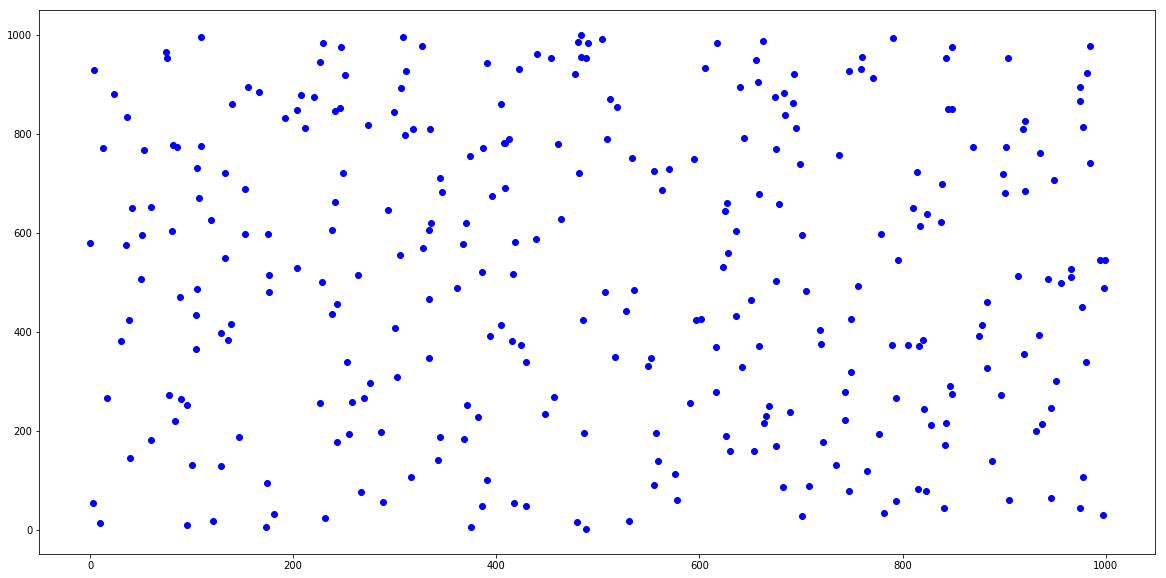

In [13]:
fig = plt.figure(figsize=(20,10))
for i in range(1):
    x_val = [x[0][0] for x in results[i]]
    y_val = [x[0][1] for x in results[i]]
    plt.plot(x_val, y_val, colors[i], marker='o', linestyle='')

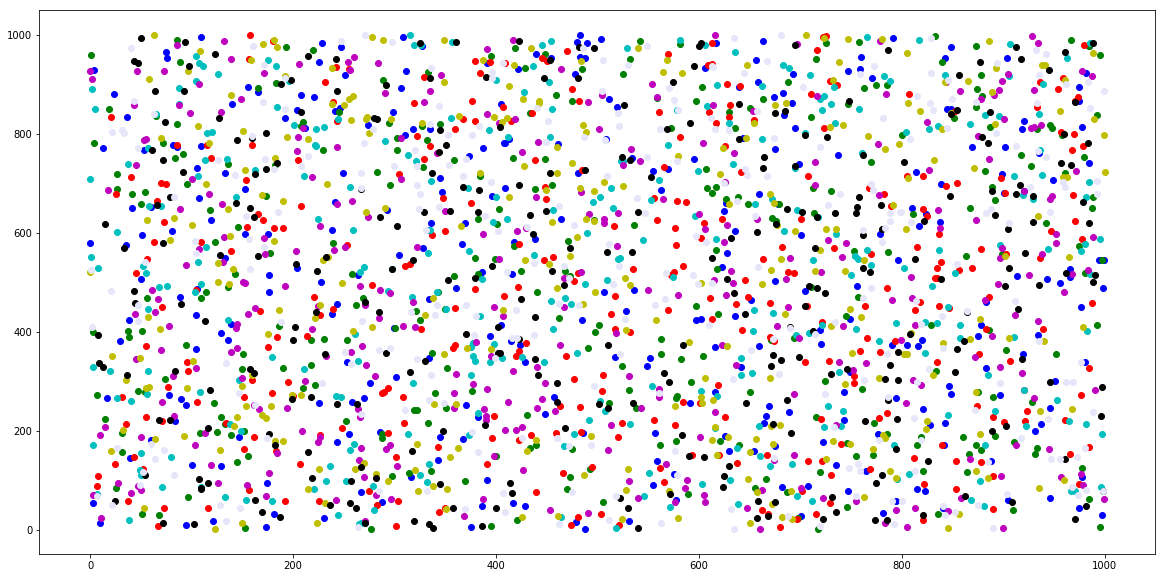

In [14]:
fig8 = plt.figure(figsize=(20,10))
for i in range(8):
    x_val = [x[0][0] for x in results[i]]
    y_val = [x[0][1] for x in results[i]]
    plt.plot(x_val, y_val, colors[i], marker='o', linestyle='')

In [15]:
start = time.time()
calc(l, L, V_MIN, V_MAX, T_STOP)
end = time.time()
print("Time for 1 day of simultated time (1 simulation): {0:.4f} s".format(end-start))
print("Mean time for 1 day of simultated time (100 simulations): {0:.4f} s".format(tot_time/100.0))


Time for 1 day of simultated time (1 simulation): 0.0103 s
Mean time for 1 day of simultated time (100 simulations): 0.0061 s


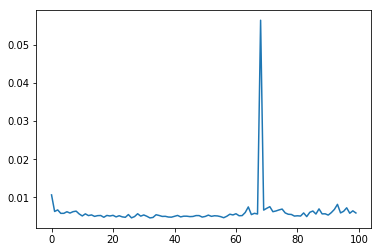

In [16]:
plt.plot(times)

### Different Viewpoints

#### Event Average (Palm) Viewpoint

#### Problem a)

In [17]:
v_0 = [x[2] for x in results[0]]
x_all = []
y_all = []
v_all = []
for i in range(len(results)):
    x_all = x_all + ([x[0][0] for x in results[i]])
    y_all = y_all + ([x[0][1] for x in results[i]])
    v_all = v_all + ([x[2] for x in results[i]])

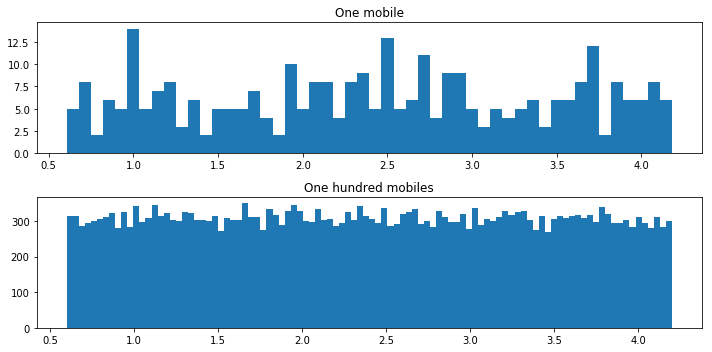

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(10, 5))
ax[0].set_title('One mobile')
ax[0].hist(v_0, bins=50)
ax[1].set_title('One hundred mobiles')
ax[1].hist(v_all, bins=100)
plt.tight_layout()
plt.show()

#### Problem b)

In [19]:
x_0 =([x[0][0] for x in results[0]])
y_0 =([x[0][1] for x in results[0]])


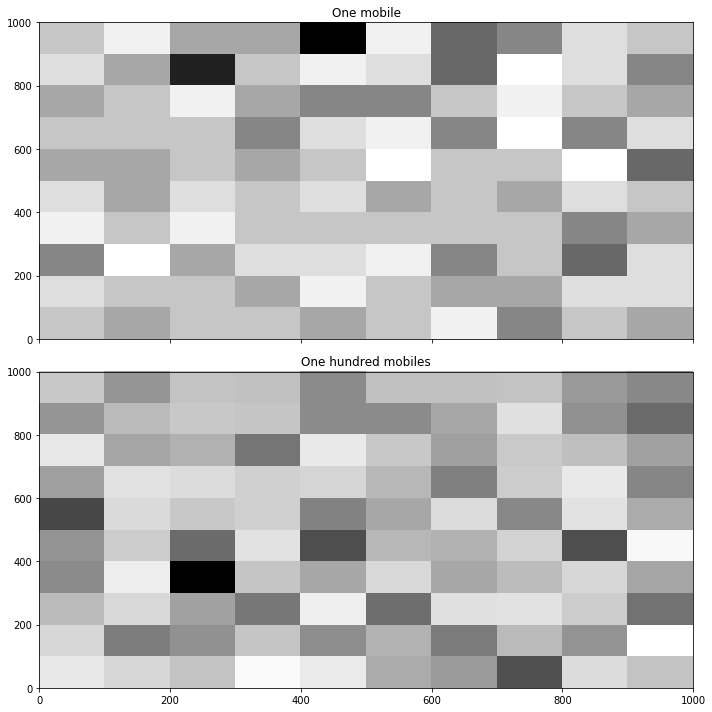

In [20]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
fig.tight_layout()
ax[0].set_title('One mobile')
ax[0].hist2d(x_0,y_0, cmap=plt.cm.Greys)
ax[1].set_title('One hundred mobiles')
ax[1].hist2d(x_all, y_all,  cmap=plt.cm.Greys)
plt.tight_layout()
plt.show()

#### Time Average Viewpoint

#### Problem a)

In [21]:
def get_time_average_vp(results, n):
    ys = []
    ms = []
    for i in range(n):
        bins = np.arange(0, T_STOP, 10)
        t = [x[1] for x in results[i]]
        p = [x[0] for x in results[i]]
        d = np.digitize(t,bins)
        s = [x[2] for x in results[i]]
        j = 0
        k = 0
        speeds=[]
        pos = []
        for l in range(len(t)-1):
            curr_time = t[l]
            #print("curr_time:", curr_time, "bins:",bins[d[j]-1])
            while(k <= bins[d[j]-1] ):
                #print("k:", k , ", speed:", s[i])
                speeds.append(s[l])
                pos.append(p[l])
                k += 10
            j+=1
        #fill up intervals after last time recorded
        while(k <= bins[d[j]-1]):
            speeds.append(s[l])
            pos.append(p[l])
            k+=10
        ys = ys + speeds
        ms = ms + pos
    return ms, ys

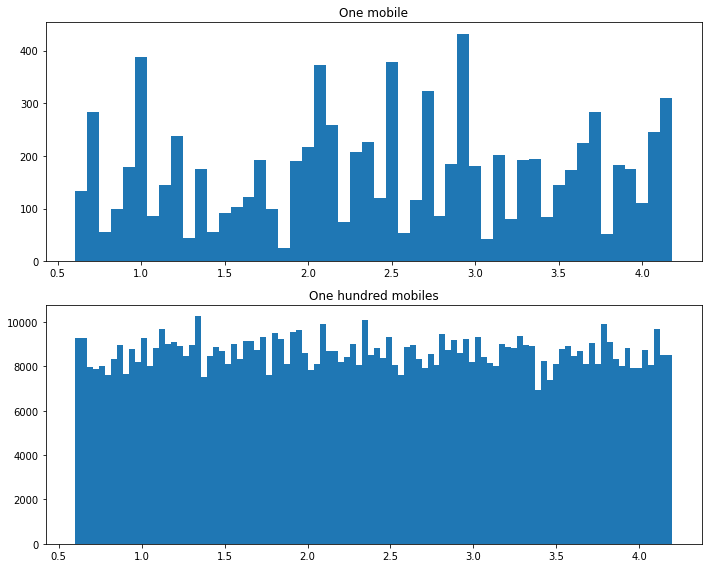

In [22]:
y_0 = get_time_average_vp(results, 1)
y_all = get_time_average_vp(results, len(results))
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].set_title('One mobile')
ax[0].hist(y_0[1], bins=50)
ax[1].set_title('One hundred mobiles')
ax[1].hist(y_all[1], bins=100)
plt.tight_layout()
plt.show()

#### Problem b)

In [23]:
x =([x[0] for x in y_0[0]])
y =([x[1] for x in y_0[0]])

In [24]:
x_al = []
y_al = []

for i in range(len(y_all[0])):
    x_al.append(y_all[0][i][0])
    y_al.append(y_all[0][i][1])

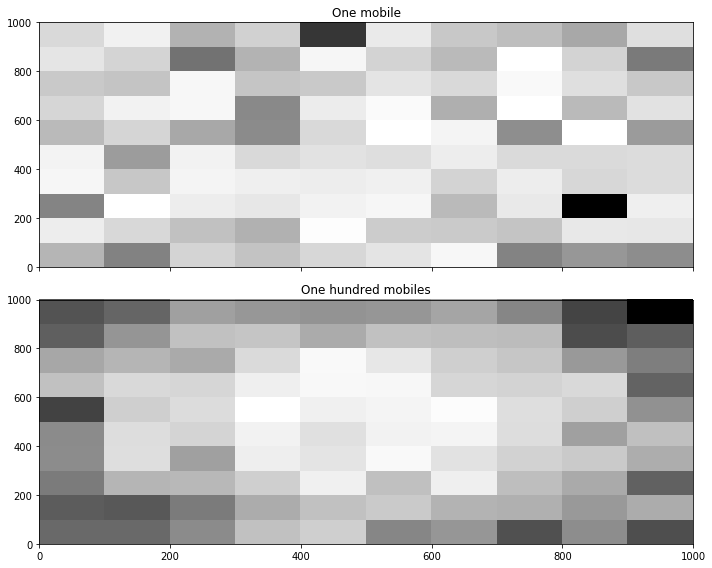

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
fig.tight_layout()
ax[0].set_title('One mobile')
ax[0].hist2d(x,y, cmap=plt.cm.Greys)
ax[1].set_title('One hundred mobiles')
ax[1].hist2d(x_al, y_al,  cmap=plt.cm.Greys)
plt.tight_layout()
plt.show()

#### Problem c)

In [26]:
#comment

### Confidence Intervals

#### Confidence Intervals for Medians and Means

#### Problem 4.1.1

In [27]:
N = 100

In [28]:
def get_x(results):
    xs = []
    for i in range(len(results)):
        tot = 0
        for j, val in enumerate(results[i]):
            tot += val[2]
        avg = tot/len(results[i])
        xs.append(avg)
    return xs

In [29]:
#for n in range(len(t)-1):
#    print(bins[d[n]-1], "<=", t[n], "<", bins[d[n]])

In [30]:
def get_y(results):
    ys = []
    for i in range(len(results)):
        bins = np.arange(0, T_STOP, 10)
        t = [x[1] for x in results[i]]
        d = np.digitize(t,bins)
        s = [x[2] for x in results[i]]
        tot_speed = 0
        j = 0
        k = 0
        for l in range(len(t)-1):
            curr_time = t[l]
            #print("curr_time:", curr_time, "bins:",bins[d[j]-1])
            while(k <= bins[d[j]-1] ):
                #print("k:", k , ", speed:", s[i])
                times.append(s[l])
                tot_speed += s[l]
                k += 10
            j+=1
        #fill up intervals after last time recorded
        while(k <= bins[d[j]-1]):
            tot_speed += s[l]
            k+=10
        ys.append(tot_speed/len(bins))
    return ys

In [31]:
def median(values, med_l, med_u, N):
    sorted_v = sorted(values)
    median = (sorted_v[med_l] + sorted_v[med_u])/2
    #theorem 2.1
    lower = math.ceil((0.5*N) - (0.980*math.sqrt(N)))
    upper = math.ceil((0.5*N) +1+ (0.980*math.sqrt(N)))
    return [sorted_v[lower],median,sorted_v[upper]]

In [32]:
def mean(values):
    tot = 0
    for i in range(len(values)):
        tot += values[i]
    mean = tot/len(values)

    diff = 0
    for i in range(len(values)):
        diff += math.pow((values[i]-mean), 2)

    #theorem asymptotic
    variance = (1.0/99.0)*diff
    std = math.pow(variance, 0.5)
    lower = mean - ((1.984/10)*std)
    upper = mean + ((1.984/10)*std)
    return [lower, mean, upper]

In [33]:
xs = get_x(results)
x_med = median(xs, 49, 50, 100)
x_mean = mean(xs)
ys = get_y(results)
y_med = median(ys, 49, 50, 100)
y_mean = mean(ys)

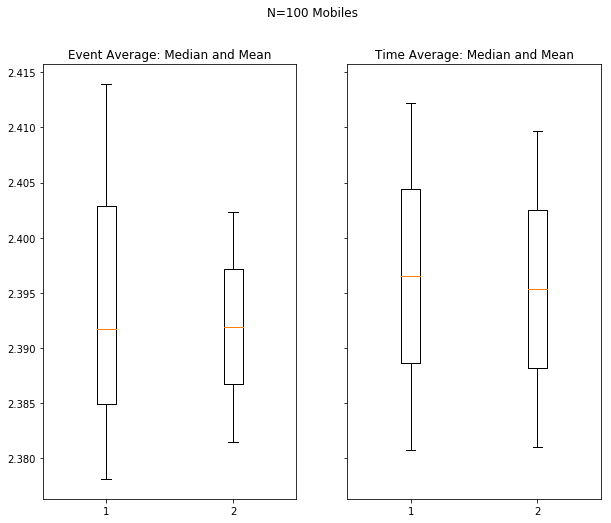

In [34]:
#plt.boxplot([x_med,x_mean],[y_med, y_mean], marker='o', linestyle='')
fig, axs = plt.subplots(1, 2, figsize=(10,8), sharey=True)
fig.suptitle("N=100 Mobiles")
axs[0].boxplot([x_med, x_mean])
axs[0].set_title("Event Average: Median and Mean")
axs[1].boxplot([y_med, y_mean])
axs[1].set_title("Time Average: Median and Mean")
plt.show()

#### Problem 4.1.2

In [35]:
(V_MIN + V_MAX)/2

2.4

In [36]:
x_mean[1]

2.3919009868196164

In [37]:
abs(x_mean[1] - y_mean[1])

0.0034255472010600307

In [38]:
abs(x_med[1] - y_med[1])

0.0047603304228895915

#### Problem 4.1.3

In [39]:
def median_odd(values, med, N):
    sorted_v = sorted(values)
    median = (sorted_v[med])
    #theorem 2.1
    lower = math.ceil((0.5*N) - (0.980*math.sqrt(N)))
    upper = math.ceil((0.5*N) +1+ (0.980*math.sqrt(N)))
    return [sorted_v[lower],median,sorted_v[upper]]

In [40]:
def mean(values, N):
    tot = 0
    for i in range(len(values)):
        tot += values[i]
    mean = tot/len(values)

    diff = 0
    for i in range(len(values)):
        diff += math.pow((values[i]-mean), 2)

    #theorem asymptotic
    variance = (1.0/(N-1))*diff
    std = math.pow(variance, 0.5)
    lower = mean - ((1.984/math.sqrt(N))*std)
    upper = mean + ((1.984/math.sqrt(N))*std)
    return [lower, mean, upper]

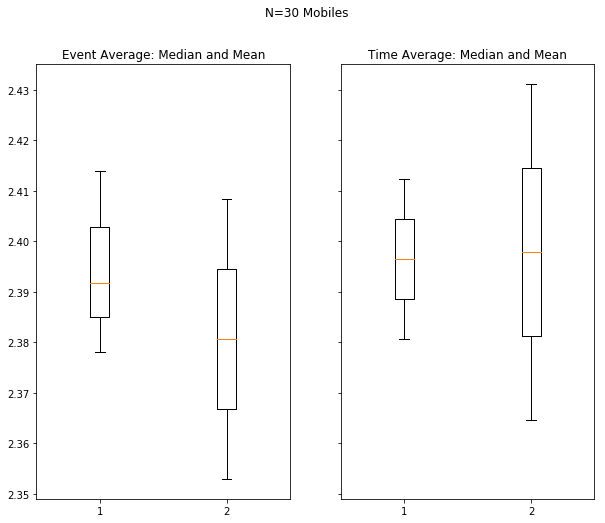

In [41]:
N=30
results_30 = []
times = []
tot_time = 0
for i in range (N):
    start = time.time()
    res = calc(l, L, V_MIN, V_MAX, T_STOP)
    end = time.time()
    results_30.append(res)
    times.append(end-start)
    tot_time = tot_time + (end-start)
    
x = get_x(results_30)
y = get_y(results_30)

x_me = median_odd(x, 15, 30)
x_mean = mean(x, 30)

y_me=median_odd(y, 15, 30)
y_mean = mean(y, 30)

#plt.boxplot([x_med,x_mean],[y_med, y_mean], marker='o', linestyle='')
fig2, axs2 = plt.subplots(1, 2, figsize=(10,8), sharey=True)
fig2.suptitle("N=30 Mobiles")
axs2[0].boxplot([x_med, x_mean])
axs2[0].set_title("Event Average: Median and Mean")
axs2[1].boxplot([y_med, y_mean])
axs2[1].set_title("Time Average: Median and Mean")
plt.show()

#### Prediction Intervals for Samples 

#### Problem 4.2.1

In [42]:
N=100
results = []
times = []
tot_time = 0
for i in range(100):
    start = time.time()
    res = calc(l, L, V_MIN, V_MAX, T_STOP)
    end = time.time()
    results.append(res)
    times.append(end-start)
    tot_time = tot_time + (end-start)

In [43]:
y = get_y(results)

In [44]:
def PI(values, N):
    tot = 0
    for i in range(len(values)):
        tot += values[i]
    mean = tot/len(values)

    diff = 0
    for i in range(len(values)):
        diff += math.pow((values[i]-mean), 2)

    #theorem asymptotic
    variance = (1.0/(N-1))*diff
    std = math.pow(variance, 0.5)
    lower = mean - (1.96*std)
    upper = mean + (1.96*std)
    return [lower, mean, upper]

In [45]:
y_PI = PI(y, 100)

In [46]:
#mu + 1.96 * s

In [47]:
l = math.ceil(101*(0.05/2))
u = math.ceil(101*(1-(0.05/2)))

sorted_y = sorted(y)
L = sorted_y[l]
U = sorted_y[u]

order = [L, y_PI[1], U]

#### Problem 4.2.2

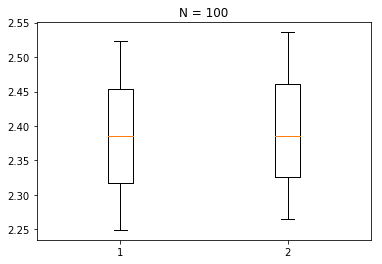

In [48]:
plt.boxplot([y_PI, order])
plt.title("N = 100")
plt.show()

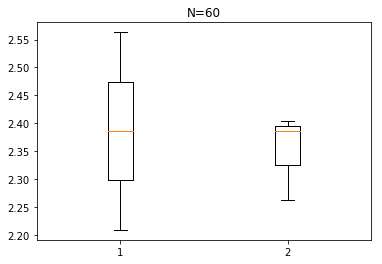

In [49]:
y_PI = PI(y, 60)
l = math.ceil(61*(0.05/2))
u = math.ceil(61*(1-(0.05/2)))

#sorted_y = sorted(y)
L = sorted_y[l]
U = sorted_y[u]

order = [L, y_PI[1], U]

plt.boxplot([y_PI, order])
plt.title("N=60")
plt.show()

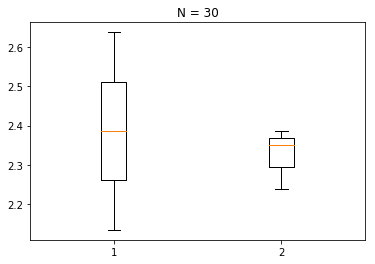

In [51]:
y_PI = PI(y, 30)
l = math.ceil(31*(0.05/2))
u = math.ceil(31*(1-(0.05/2)))

#sorted_y = sorted(y)
L = sorted_y[l]
U = sorted_y[u]

order = [L, y_PI[1], U]

plt.boxplot([y_PI, order])
plt.title("N = 30")
plt.show()

In [56]:
U

2.3508834333307416

#### Problem 4.2.3

#### Problem 4.2.4